demo_data 폴더에 있는 heatmap sample data를 로딩합니다. (270, 5555) 차원의 kmeans clustering centroids 입니다. 

In [1]:
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

with open('./demo_data/heatmap_sample_data.pkl', 'rb') as f:
    centroids = pickle.load(f)

In [2]:
centroids.shape

(270, 5555)

centroids 의 순서는 각 centroids 간의 유사도가 반영되지 않기 때문에 격한 체크무늬가 만들어질 수 있습니다. 비슷한 centroids 들이 존재하는지 확인하기 위해서는 정렬을 하여야 합니다. 

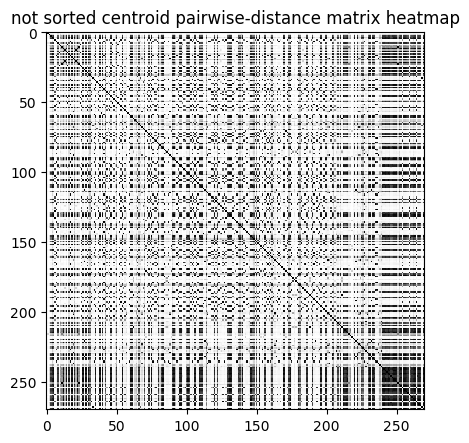

In [3]:
from clustervis import visualize_heatmap

figure, indices_reordered, segments = visualize_heatmap(centroids,
                                                        dpi=100,
                                                        figsize=(5,5),
                                                        title='not sorted centroid pairwise-distance matrix heatmap'
                                                       )

dist_pole 은 pole clustering 을 수행하여 centroids 를 정렬합니다. Pole clustering 은 주어진 거리 척도 (metric) 의 최대 길이가 dist_pole_max_dist 를 넘지 않는 행끼리 하나의 군집으로 묶어줍니다. 군집의 객체 순으로 정렬되기 때문에 아래와 같이 centroids 의 전체적인 구조를 파악하기 쉽습니다. Centroids 의 각 군집은 line_color 로 구분되어 시각화됩니다. 

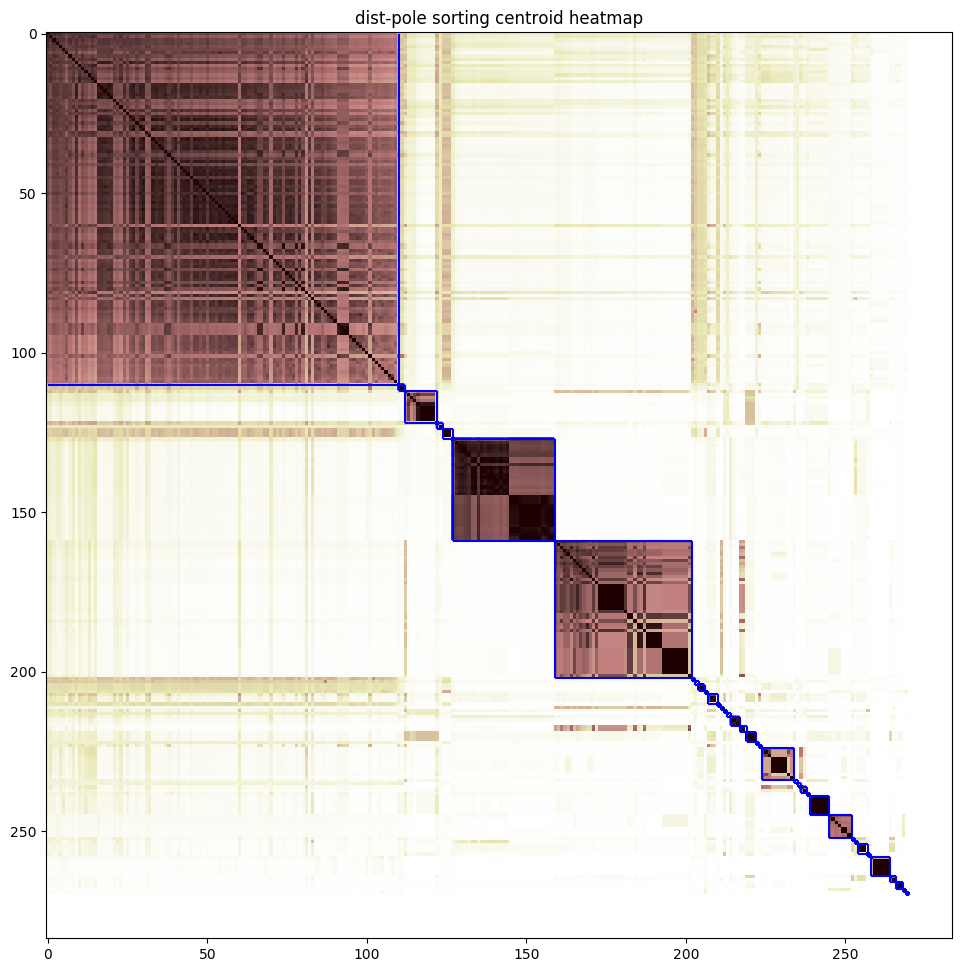

In [4]:
from clustervis import visualize_heatmap

figure, indices_reordered, segments = visualize_heatmap(centroids,
                                                        sort='dist_pole',
                                                        dpi=100,
                                                        figsize=(12,12),
                                                        title='dist-pole sorting centroid heatmap',
                                                        dist_pole_max_dist = 0.5,
                                                        metric = 'cosine',
                                                        cmap = 'pink',
                                                        line_width=1.5,
                                                        line_color='blue'
                                                       )

그림은 savefig() 를 이용하여 파일로 저장할 수 있습니다. 

In [5]:
figure.savefig('./demo_data/centroid_heatmap.png', dpi=50)

![centroid_heatmap](demo_data/centroid_heatmap.png)

정렬된 순서는 indices_reordered 에, centroids 의 각 군집의 labels 은 segments 에 저장됩니다. 

In [6]:
print(indices_reordered[:20])
print(segments[100:130])

[20, 173, 16, 4, 90, 252, 262, 80, 150, 30, 42, 190, 102, 148, 50, 31, 170, 54, 61, 40]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5]


Pole clustering 외에도 segmentation / sorting 방법은 계속 연구중입니다. row_sum 은 pairwise_distance matrix 의 row sum 을 한 뒤, 이 값을 정렬합니다. 전체적인 거리가 가장 작은 centroids 들이 앞쪽에 위치하기 때문에 major cluster 를 찾을 수 있습니다. 

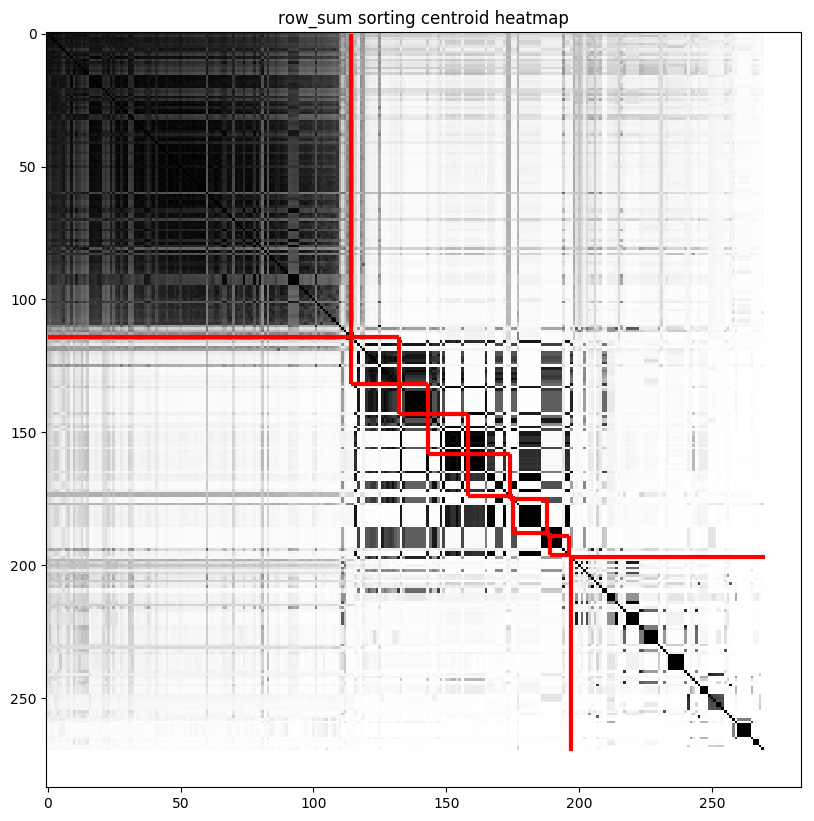

In [7]:
from clustervis import visualize_heatmap

figure, indices_reordered, segments = visualize_heatmap(centroids,
                                                        sort='row_sum',
                                                        segmentor='reverse_band',
                                                        dpi=100,
                                                        figsize=(10,10),
                                                        title='row_sum sorting centroid heatmap',
                                                        filter_width = int(centroids.shape[0]*0.5),
                                                        band_width = 10
                                                       )